In [1]:
#This the main script file it is intended to be minimal and to run all other parts of the code

##! UPLOAD EVERTHING TO CUDA!!!
##!fix the class cropper
##!fix the data flattening 
##!replace cross entropy with NLL later on

#in code from "visualizing NDF":
##! check out save flag
##! check out logger
##! check out cache
##! check out getting parametrs form command line
##! perhaps ra5ndomize target batches
##! replace all .cuda() with torch.new
##! add grad=False to all not learn
##! add batchnorm

import torch
from functools import partial

device = torch.device('cuda',0)
torch.cuda.set_device(device)

#load configuration
from params import parameters
conf = parameters()
conf.epochs = 3

In [2]:
#load dataset
import dataset_loader

# c = class_counter(conf,datasets=None, n_classes=2)
n,m,c = dataset_loader.data_shape(conf, datasets=None, n_classes=2)
data = dataset_loader.DataBunch(*dataset_loader.get_dls(conf,n_classes = c),c,features4tree=10)

AttributeError: module 'dataset_loader' has no attribute 'data_shape'

In [3]:
#initialize network
import model_conf

loss_func = torch.nn.functional.nll_loss ##!replace with NLL later on
learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

In [4]:
#train
import trainer

run = trainer.Runner(cb_funcs=conf.cbfs)

In [5]:
run.fit(conf.epochs, learn)

train: [1.095480859375, tensor(0.3498, device='cuda:0')]
valid: [0.433051318359375, tensor(0.2874, device='cuda:0')]
train: [0.8219638671875, tensor(0.9290, device='cuda:0')]
valid: [0.65327373046875, tensor(0.9866, device='cuda:0')]
train: [0.6372633463541667, tensor(0.9905, device='cuda:0')]
valid: [0.635069091796875, tensor(0.9872, device='cuda:0')]


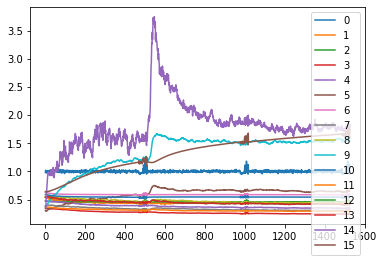

In [8]:
#with an additional batchnorm:
for l in learn.model.act_stds: 
    plt.plot(l)
plt.legend(range(len(learn.model.act_means)));

In [7]:
import matplotlib.pyplot as plt
for l in learn.model.act_stds: 
    plt.plot(l)
plt.legend(range(len(learn.model.act_means)));

In [ ]:
#plot
import matplotlib.pyplot as plt
for l in learn.model.act_means: 
    plt.plot(l)
plt.legend(range(len(learn.model.act_means)));

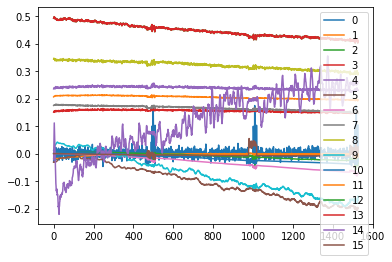

In [12]:
#plot
import matplotlib.pyplot as plt
for l in learn.model.act_means: 
    plt.plot(l)
plt.legend(range(len(learn.model.act_means)));

In [ ]:
m = learn.model.act_means
s = learn.model.act_stds
plt.plot(s[-1])

train: [0.8774529296875, tensor(0.9652, device='cuda:0')]
valid: [0.529323046875, tensor(0.9897, device='cuda:0')]
train: [0.39110234375, tensor(0.9904, device='cuda:0')]
valid: [0.260058837890625, tensor(0.9923, device='cuda:0')]
train: [0.21480187174479168, tensor(0.9929, device='cuda:0')]
valid: [0.14948404541015625, tensor(0.9919, device='cuda:0')]


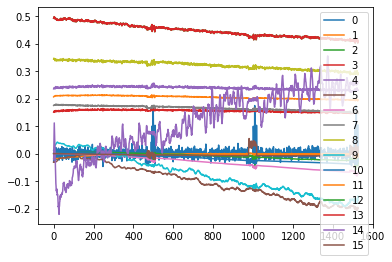

In [10]:
conf = parameters(use_tree=False)
conf.epochs = 3
learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)
run = trainer.Runner(cb_funcs=conf.cbfs)
run.fit(conf.epochs, learn)

for l in learn.model.act_means: 
    plt.plot(l)
plt.legend(range(len(learn.model.act_means)));

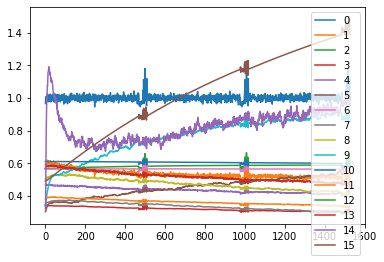

In [11]:
for l in learn.model.act_stds: 
    plt.plot(l)
plt.legend(range(len(learn.model.act_means)));